# 5th project of Mathematical-Computational Modeling (7600059) 
## Professor: Luciano da Fontoura Costa
### Name: Victor Foscarini Almeida
### nUSP:10728101

## Genetic Algorithms: traveling salesman
#### Steps for a genetic algorithm:
1. Create the population
2. Determine fitness
3. Select the mating pool
4. Breed
5. Mutate
6. Repeat

Sources:
- https://towardsdatascience.com/evolution-of-a-salesman-a-complete-genetic-algorithm-tutorial-for-python-6fe5d2b3ca35
- https://www.programiz.com/python-programming/methods/built-in/repr
- https://pythonspot.com/inner-classes/#:~:text=An%20inner%20class%20or%20nested,general%20inner%20classes%20are%20avoided.
- https://github.com/lccasagrande/TSP-GA/blob/master/src/tsp_ga.py
- https://networkx.org/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random, operator

from geneticClass import City, GeneticAlgo #classes used to do operations (shown in the end)

# Positioning cities in a circle

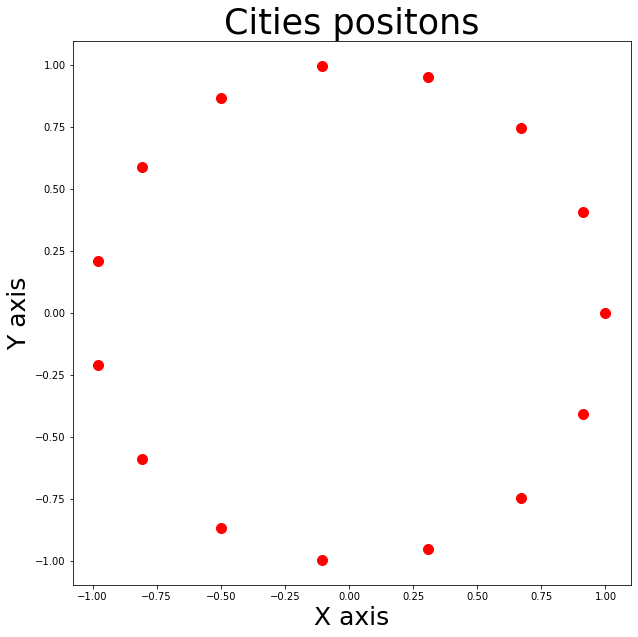

In [2]:
#Validation: positioning cities in a circle
#circle equation: (x,y) = R(cos(theta),sin(theta)), 0<theta<2*pi

# to simplify, use radius of 1 and array of cities
R=1;cities=[]
for theta in np.linspace(0,2*np.pi,16)[:-1]:
    cities.append(City(R*np.cos(theta),R*np.sin(theta)))
    
#plot to visualize cities
plt.figure(figsize=(10,10))
for city in cities:
    plt.plot([city.x],[city.y],marker='o',markersize=10,color="red")
plt.xlabel("X axis",fontsize=25)
plt.ylabel("Y axis",fontsize=25)
plt.title("Cities positons",fontsize=35)
plt.show()

# Creating individual: routes

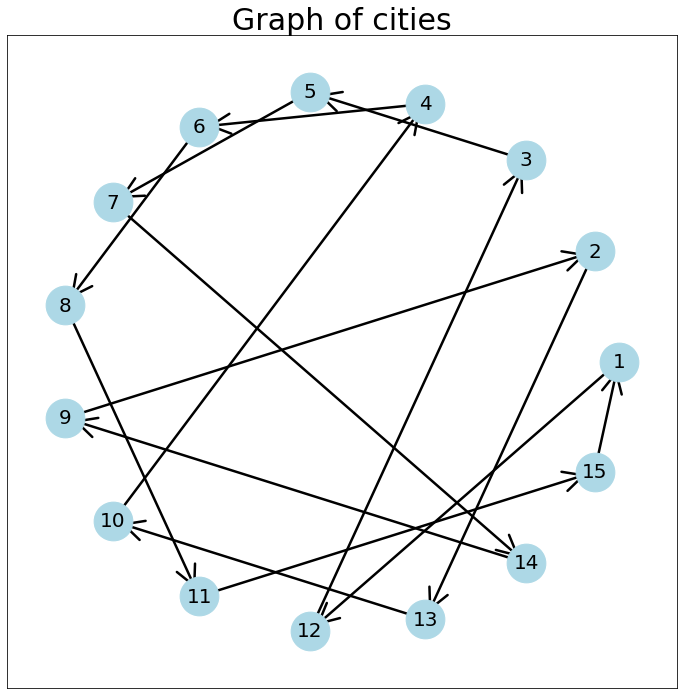

In [3]:
#Individual: create a random shuffled array of cities in the circle
algo = GeneticAlgo(cities)
algo.plot_as_graph(algo.createRoute())

# Creating population

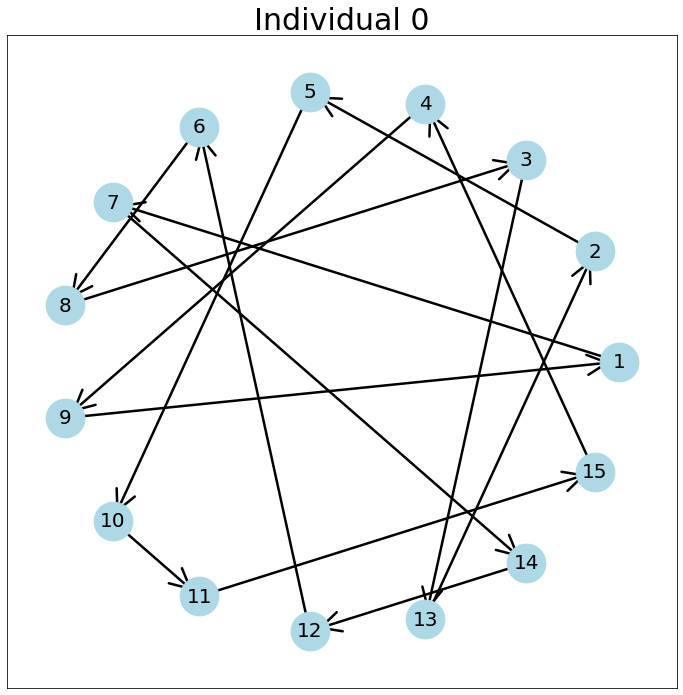

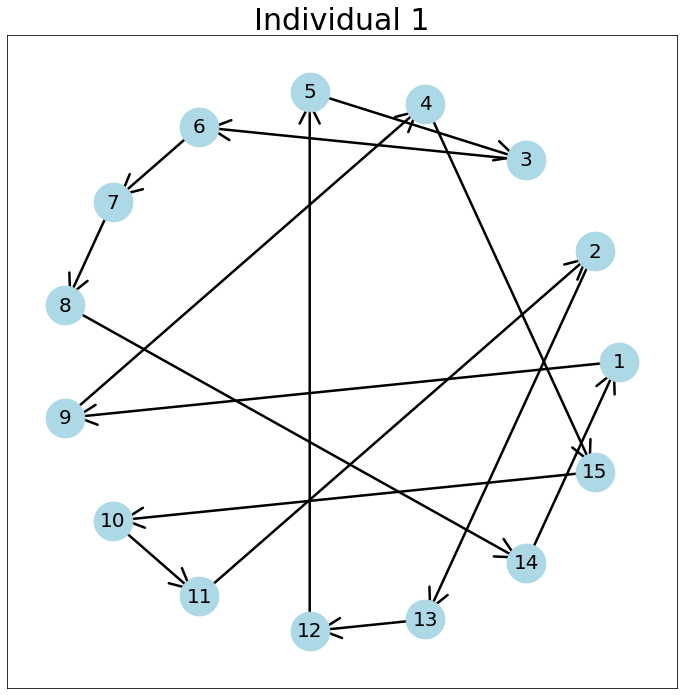

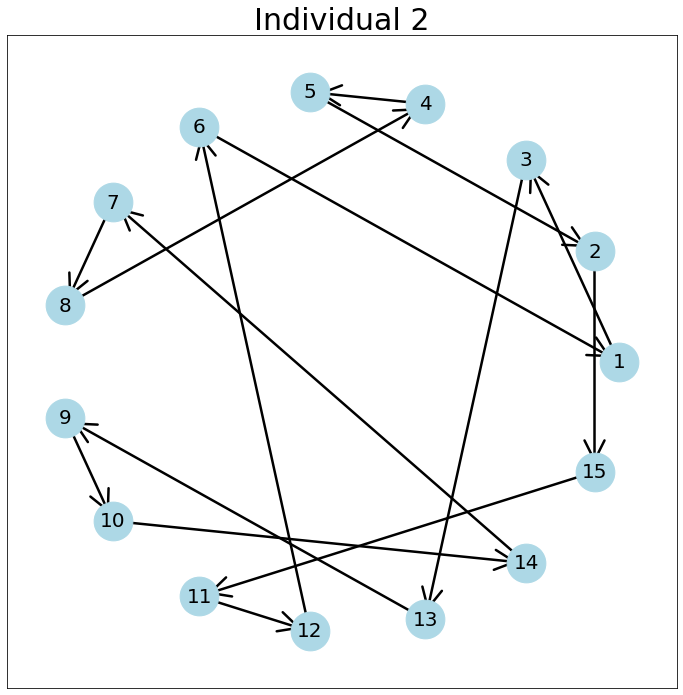

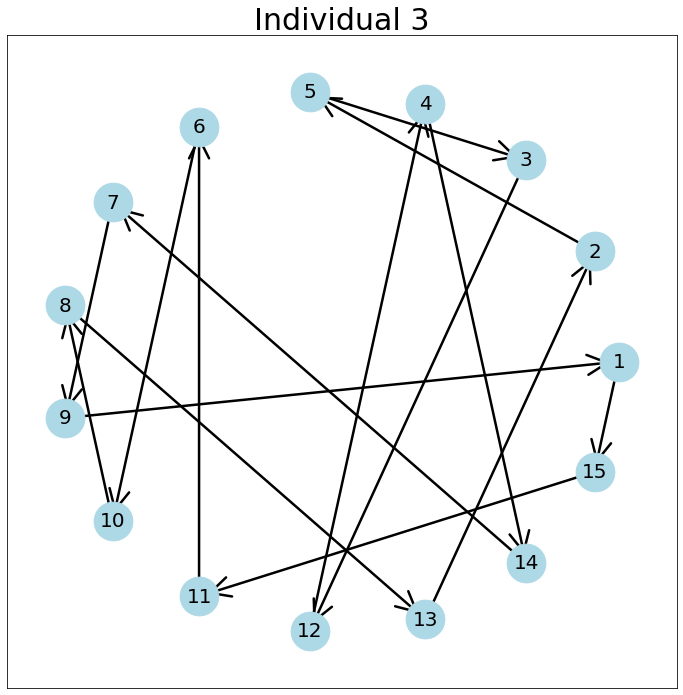

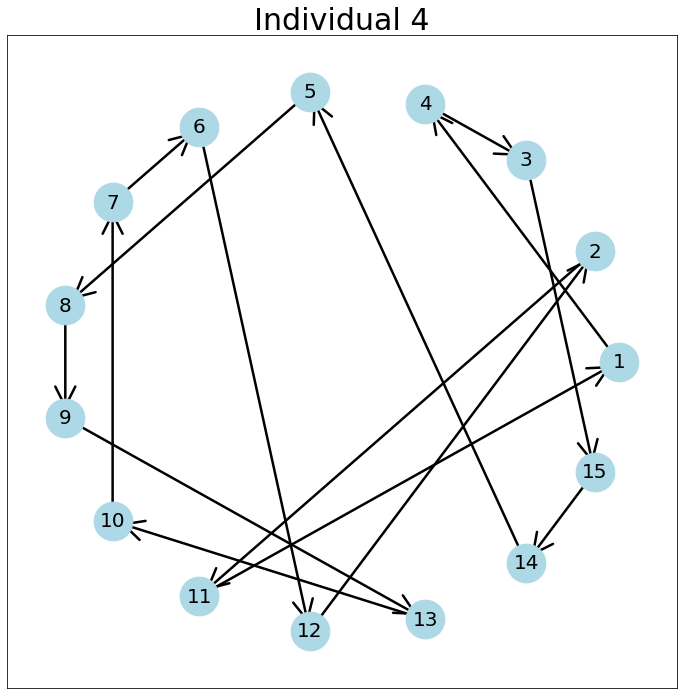

In [4]:
initialPop = algo.initialPopulation(5)
for i in range(len(initialPop)):
    algo.plot_as_graph(initialPop[i],title="Individual "+str(i))

# Ranking routes

In [5]:
algo.rankRoutes()

[(2, -17.766227645713982),
 (4, -18.197876413330274),
 (1, -18.68480516713126),
 (3, -21.556079525046208),
 (0, -22.387726288317246)]

# Selectiong and considering elite

In [6]:
algo.selection(eliteSize=2)

[2, 4, 0, 0, 0]

# Breeding population through matingPool

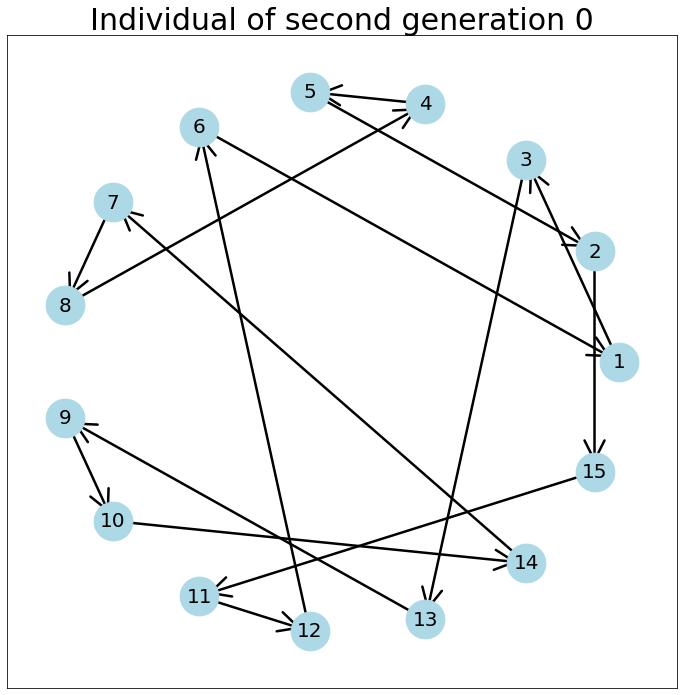

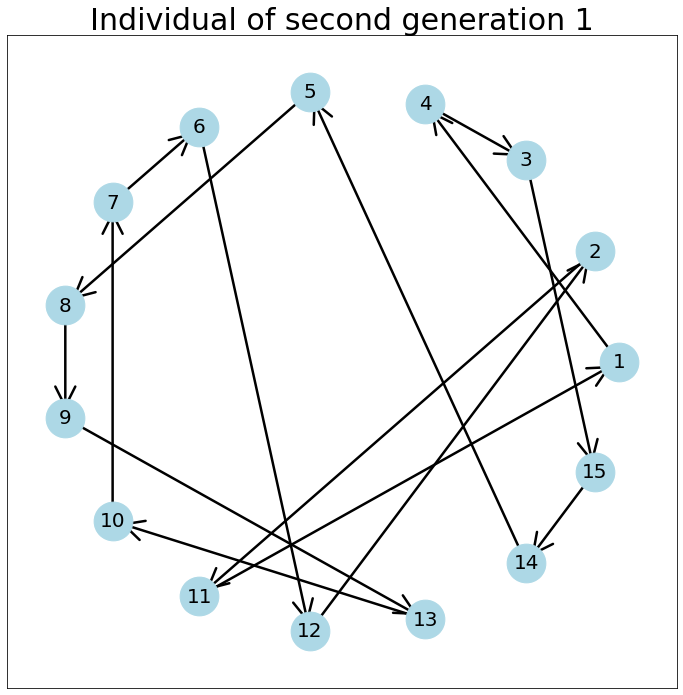

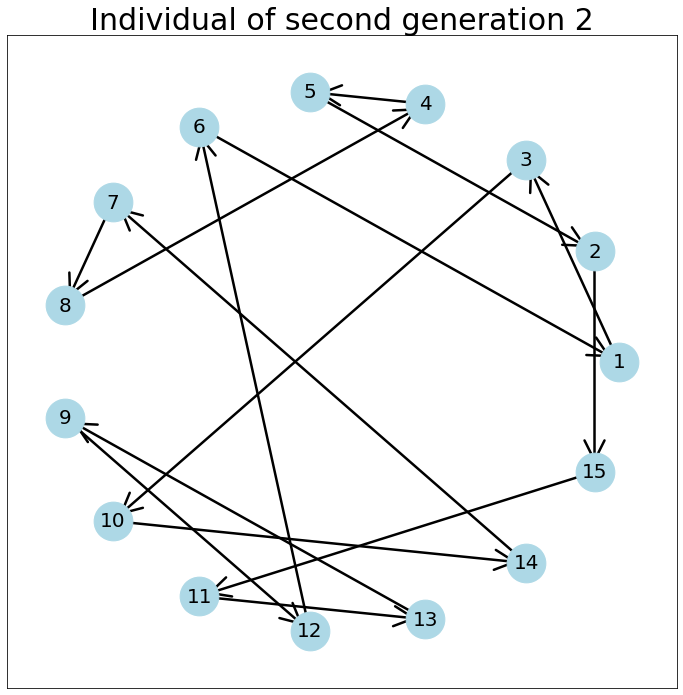

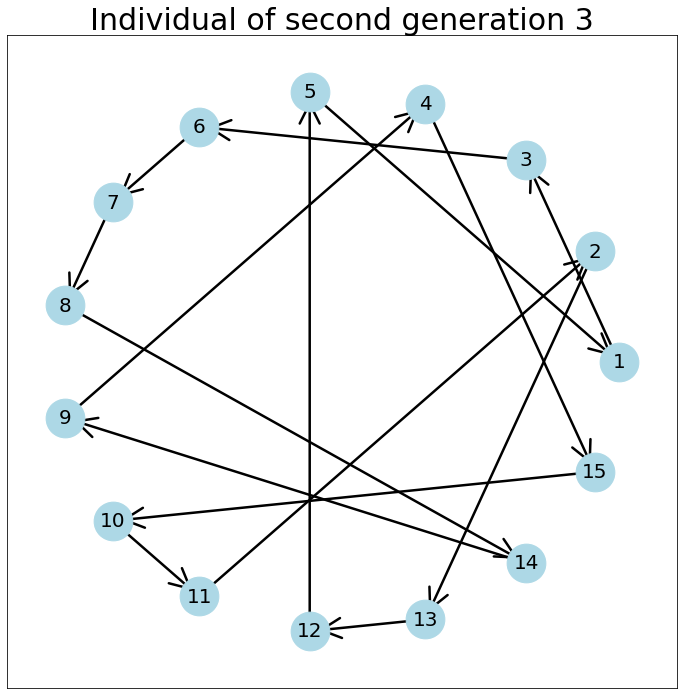

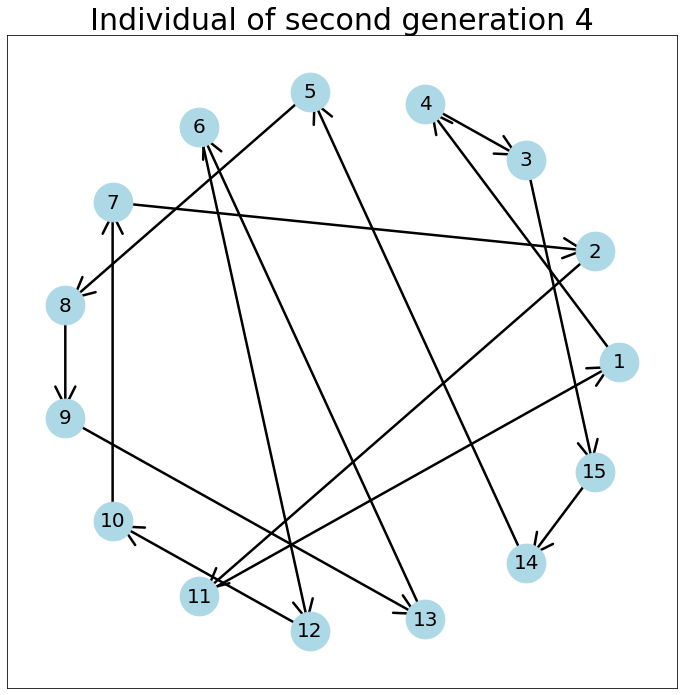

In [7]:
algo.matingPool(2)
Pop = algo.breedPopulation(2)
for i in range(len(Pop)):
    algo.plot_as_graph(Pop[i],title="Individual of second generation "+str(i))

# Mutating population

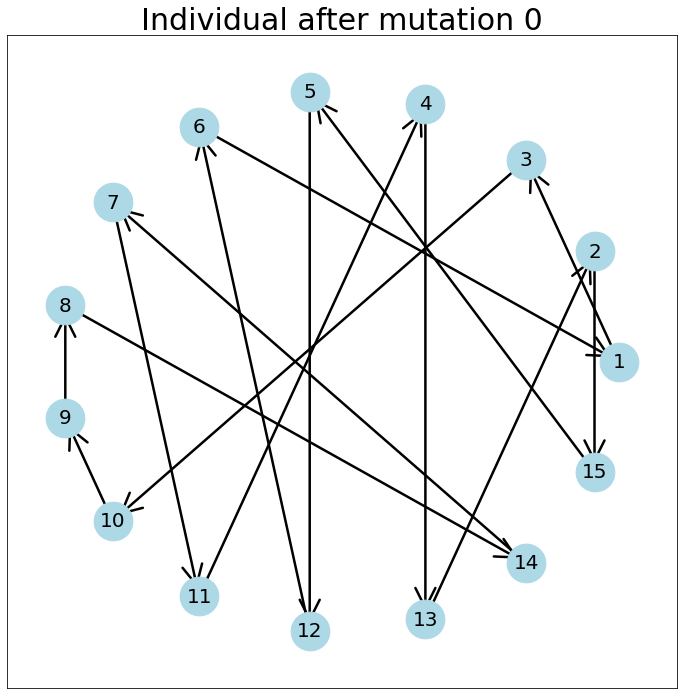

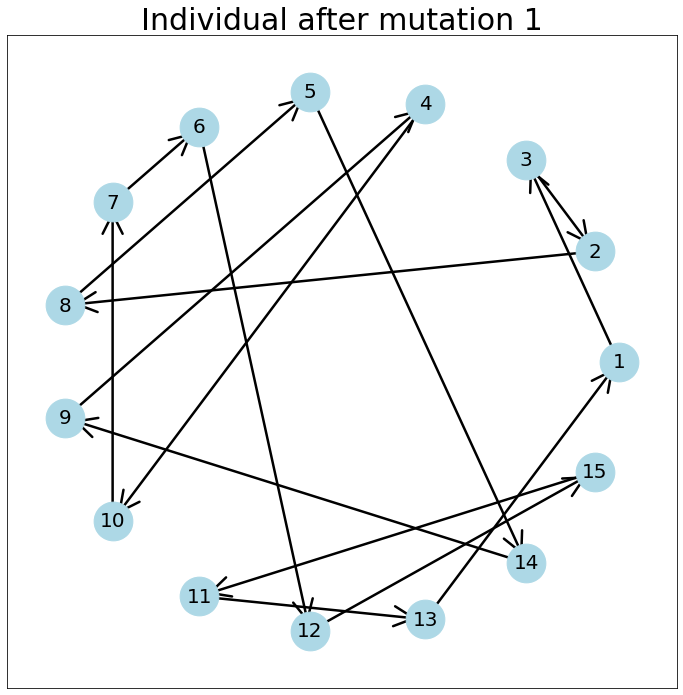

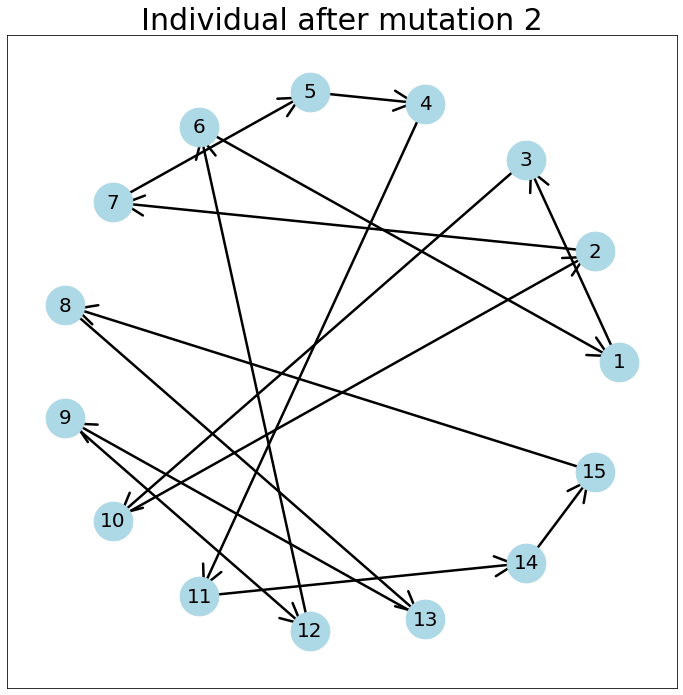

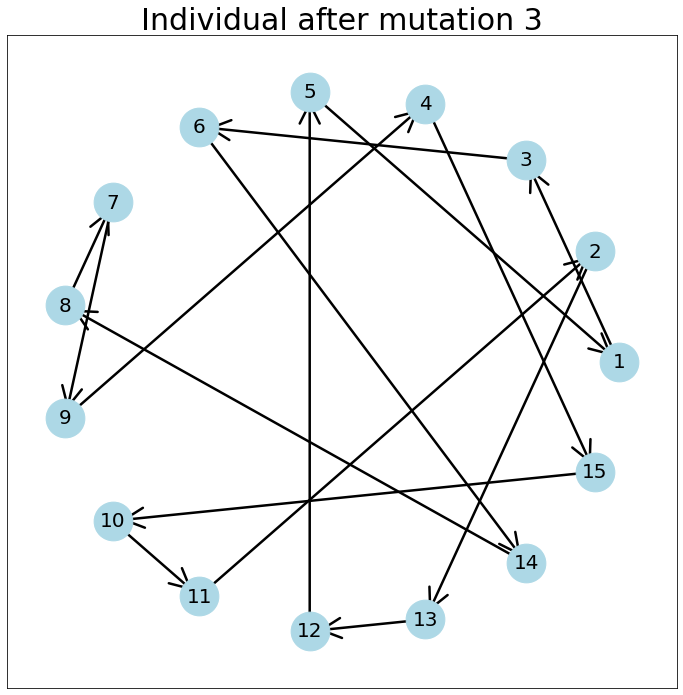

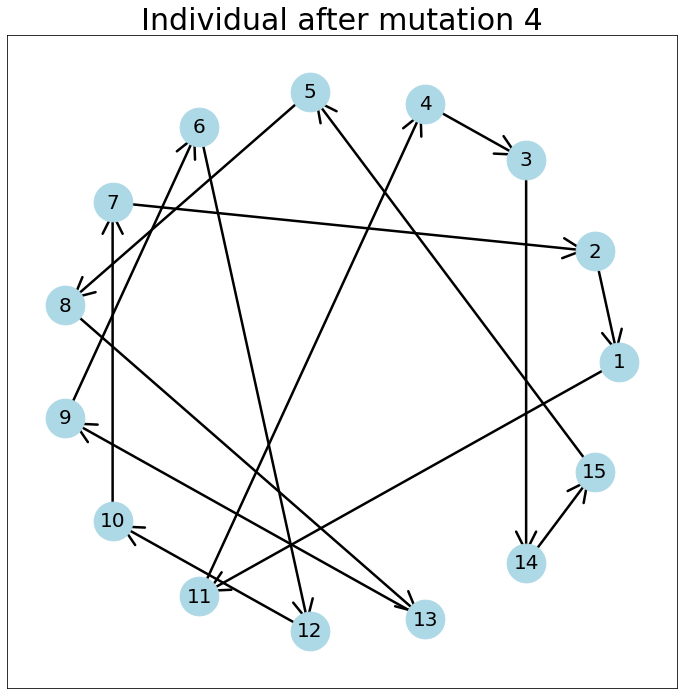

In [8]:
Pop = algo.mutatePopulation(mutationRate=0.25)

for i in range(len(Pop)):
    algo.plot_as_graph(Pop[i],title="Individual after mutation "+str(i))

# Complete algorithm: visualizing the shortest path along execution

Initial distance: 14.928157882743104


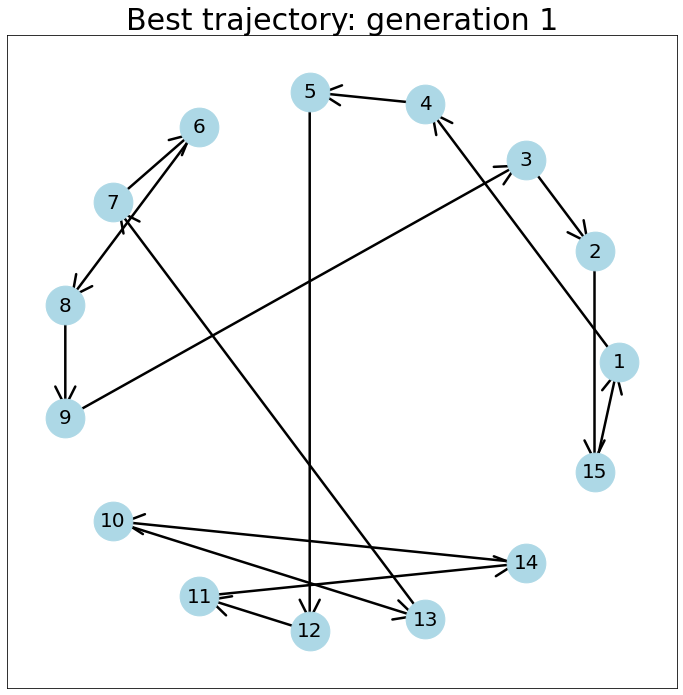

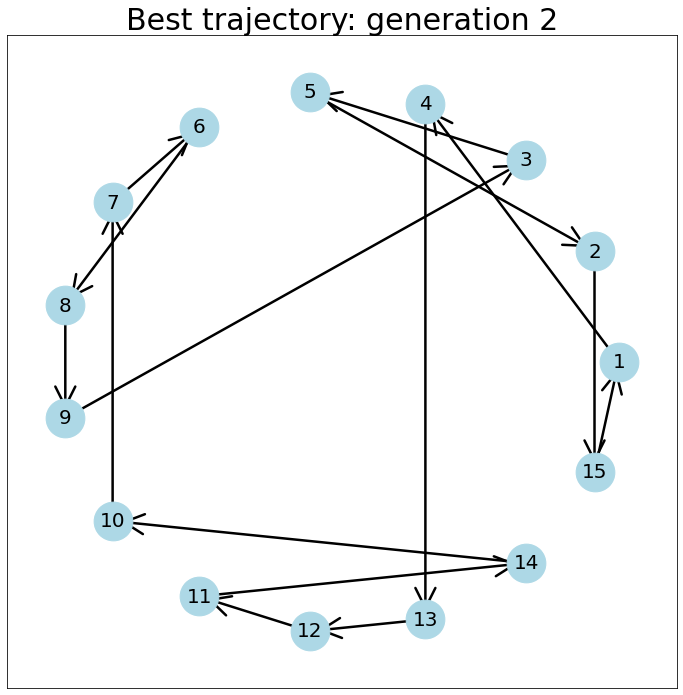

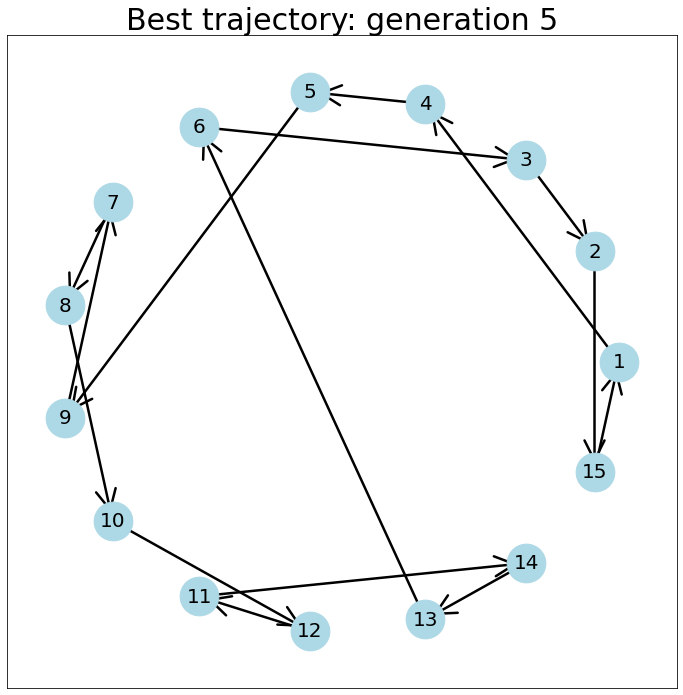

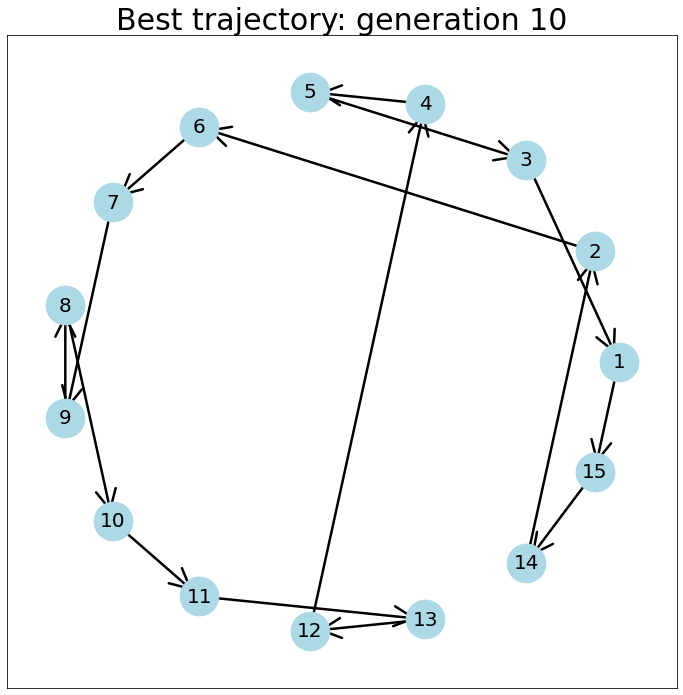

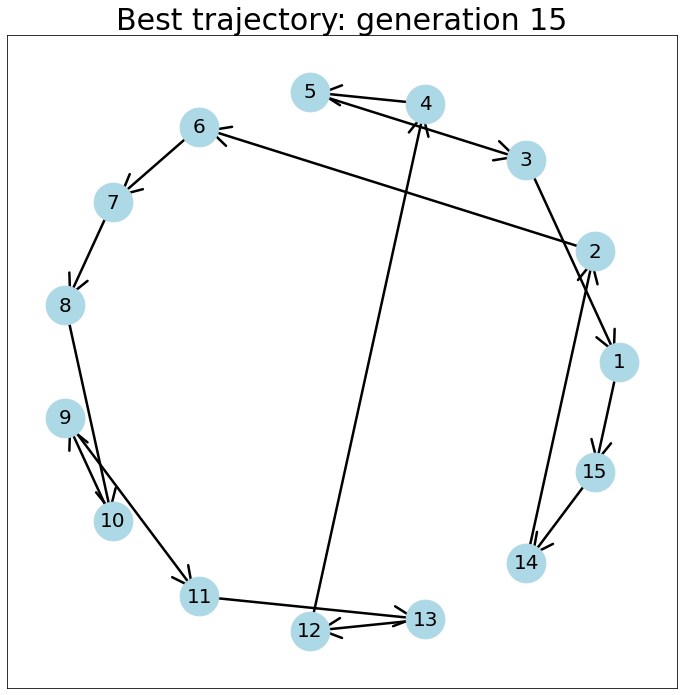

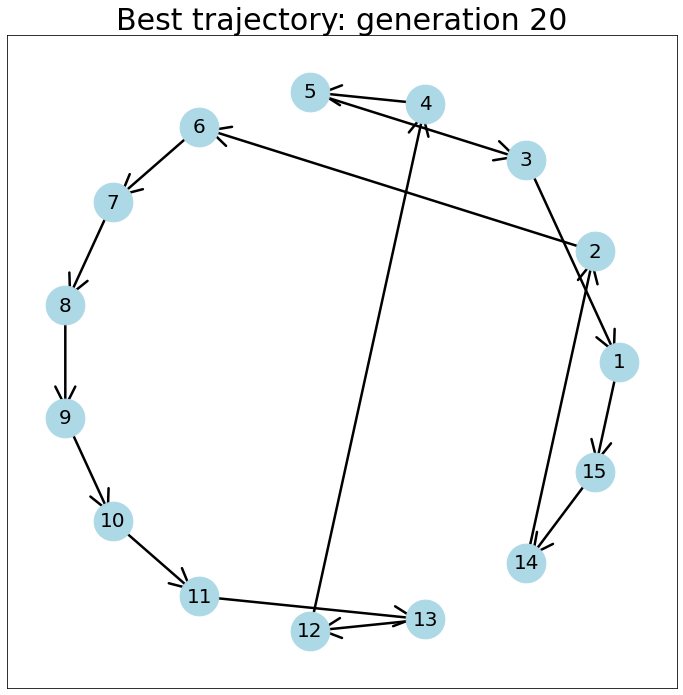

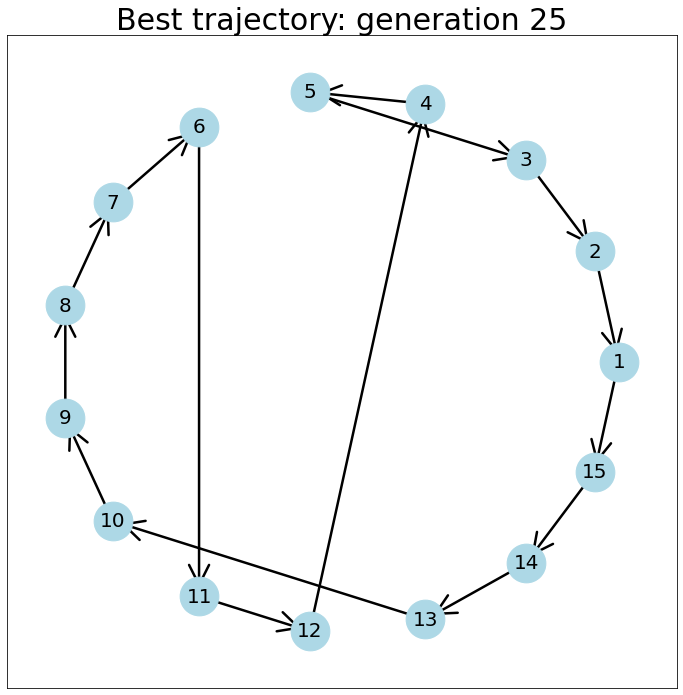

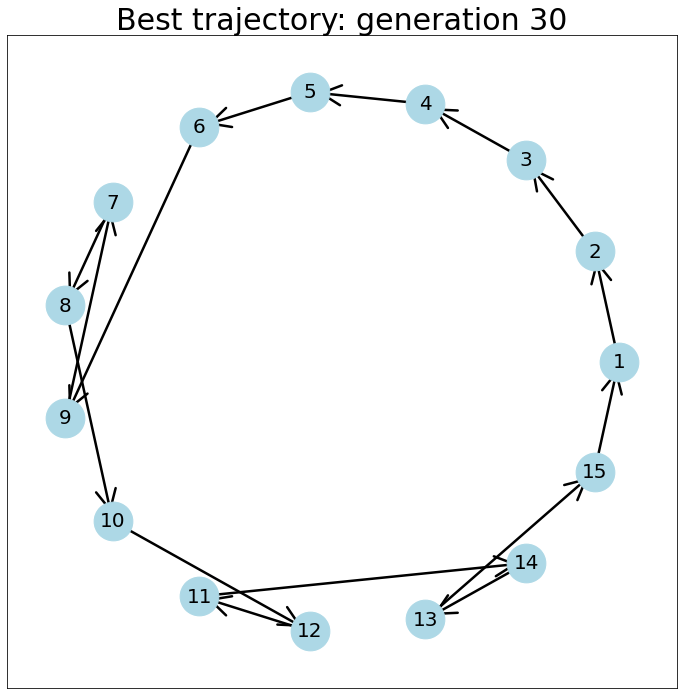

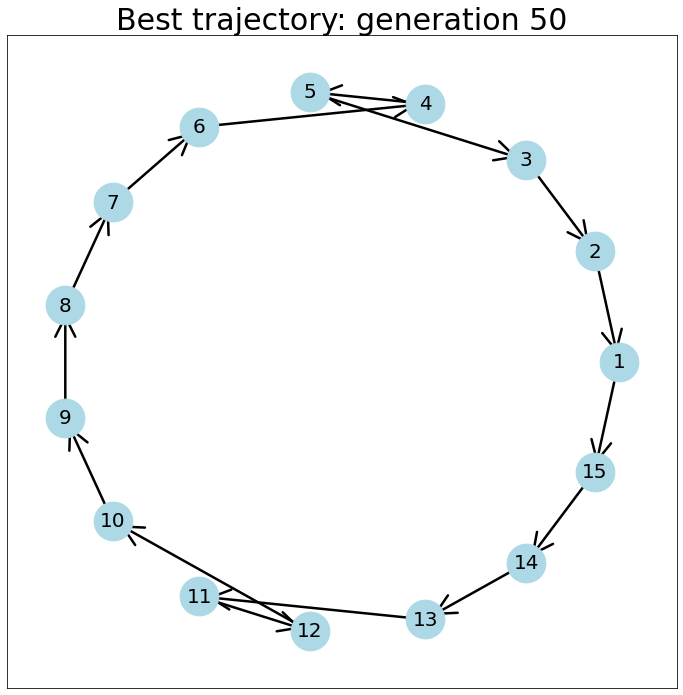

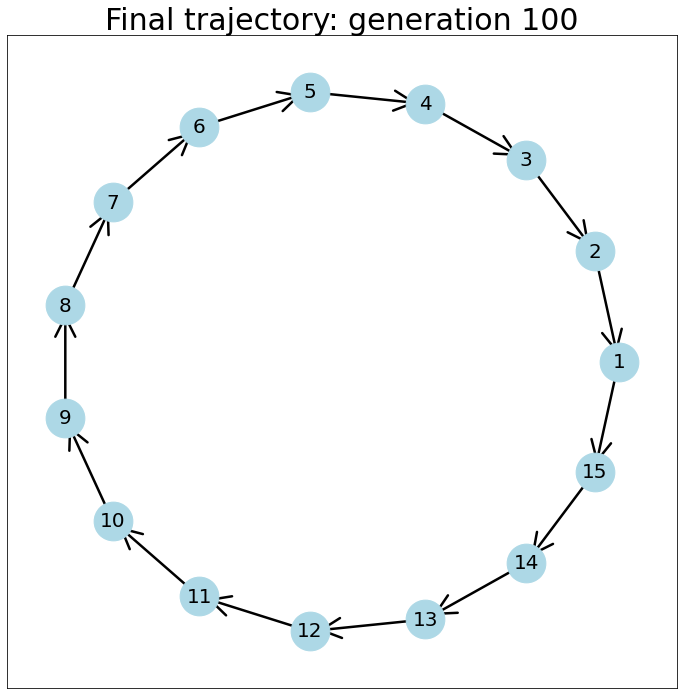

Final distance: 6.237350724532779


In [9]:
from geneticClass import City, GeneticAlgo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random, operator

# create cities
R=1;cities=[]
for theta in np.linspace(0,2*np.pi,16)[:-1]:
    cities.append(City(R*np.cos(theta),R*np.sin(theta)))
#start Algo with cities
algo = GeneticAlgo(cities)
#apply algorithm
algo.apply_geneticAlgorithm(popSize=100,eliteSize=20,mutationRate=0.01,Ngenerations=100,showRoute=True)

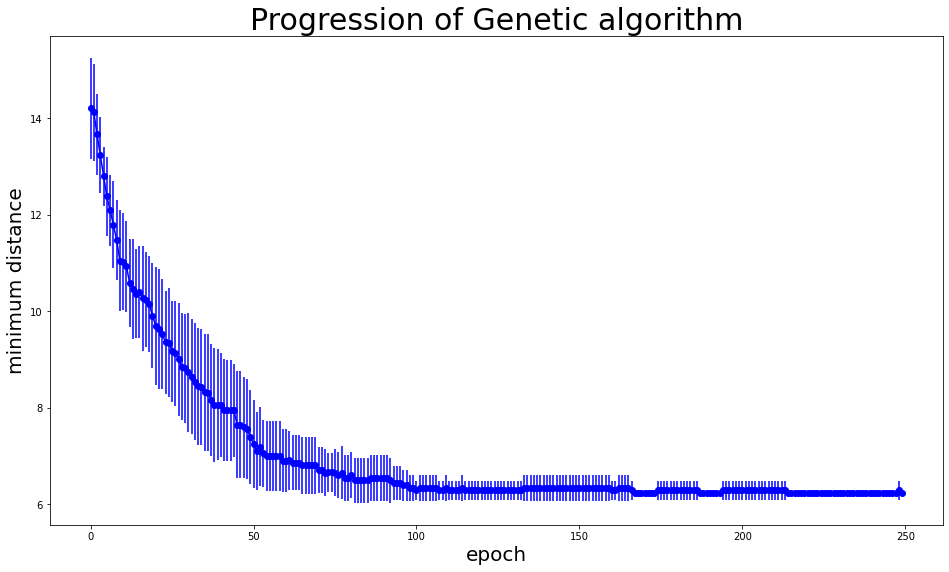

In [10]:
from geneticClass import City, GeneticAlgo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random, operator

#apply algorithm 15 times to get average and deviation
n=15
results = []

for n in range(n):
    # create cities
    R=1;cities=[]
    for theta in np.linspace(0,2*np.pi,16)[:-1]:
        cities.append(City(R*np.cos(theta),R*np.sin(theta)))
    #start Algo with cities
    algo = GeneticAlgo(cities)
    #apply algorithm
    results.append(algo.apply_geneticAlgorithm(popSize=100,eliteSize=20,mutationRate=0.01,Ngenerations=250,showRoute=True,returnArray=True))

results = np.array(results)
    
mean = results.mean(0)
deviation = results.std(0)

plt.figure(figsize=(16,9))
plt.title("Progression of Genetic algorithm",fontsize=30)
plt.ylabel("minimum distance",fontsize=20)
plt.xlabel("epoch",fontsize=20)
plt.errorbar(np.arange(len(mean)),mean,yerr=deviation,fmt='o',color='blue')
plt.plot(np.arange(len(mean)),mean,color='blue')
plt.show()

# Fazendo busca aleatória para comparar

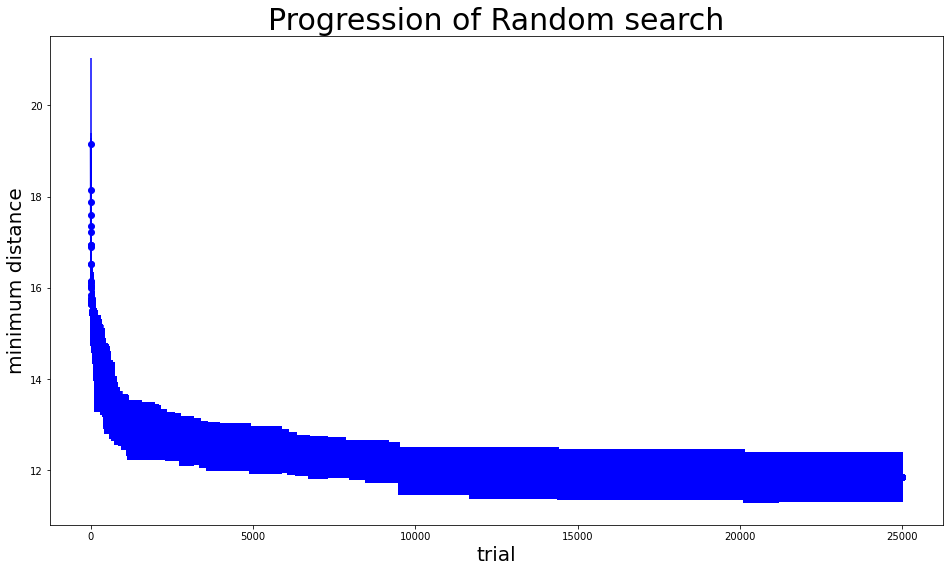

In [11]:
#random search
#Population: we generate a first population of routes (next ones will be trough breeding and mutation)
#note that distance is always bigger than what was found by genetic algorithm
algo = GeneticAlgo(cities)

def randomSearch(popSize,cityList):
    
    route = random.sample(cityList,len(cityList))
    distance = algo.routeFitness(route)
    results = []
    
    for i in range(popSize):
        route = random.sample(cityList,len(cityList))
        route_distance = algo.routeFitness(route)
        
        if distance<route_distance:
            distance = route_distance
            
        results.append(-distance)
        
    return results

size = 25000 #population x Ngenerations (100x250)
n_trials = 15

results = []
for i in range(n_trials):
    results.append(randomSearch(size,cities)) #returns smallest distance found by random search
    
results = np.array(results)
    
mean = results.mean(0)
deviation = results.std(0)

plt.figure(figsize=(16,9))
plt.title("Progression of Random search",fontsize=30)
plt.ylabel("minimum distance",fontsize=20)
plt.xlabel("trial",fontsize=20)
plt.errorbar(np.arange(len(mean)),mean,yerr=deviation,fmt='o',color='blue')
plt.plot(np.arange(len(mean)),mean,color='blue')
plt.show()

#### Note that comparing with random search, the results that were chosen are much worse than those sought with the genetic algorithm. Very large computational power would be needed to solve this problem with random search, since with the genetic algorithm a good result is obtained quickly.

# Analysing parameters

In [12]:
#we try some good parameters to see wich one is the best
#we vary each parameter a bit to see what are the best ones

good_configurations = []
for popSize in [50,100,150]:
    for eliteSize in [15, 20, 25]:
        for mutationRate in [0.001, 0.01, 0.1]:
            for generations in [100, 500, 1000]:
                params = popSize,eliteSize,mutationRate,generations
                print(params)
                algo = GeneticAlgo(cities)
                algo.apply_geneticAlgorithm(popSize,eliteSize,mutationRate,generations)
                result = algo.finalresult
                if result <= 6.237350724532779:
                    good_configurations.append([params,result])

(50, 15, 0.001, 100)
Initial distance: 16.418246824968943


TypeError: '<=' not supported between instances of 'NoneType' and 'float'

In [ ]:
print("Best configurations found:")
for configuration in good_configurations:
    print("Configuration: "+str(configuration[0])+"  "+"Distance; "+str(configuration[1]))

### As we can see, many parameter configurations give the optimal result, so, by occam's razor, we shall choose the one that seems most simple.
### One parameter configuration:
- popSize = 100
- eliteSize = 20
- mutationRate = 0.01
- Ngenerations = 100

obs: this algorithm has a random nature, so it may not give the same result everytime, so the best parameters depend a lot on the nature of the problem.

# Classe utilizada para fazer as operações que são chamadas acima

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random, operator
import networkx as nx

#Create the population: stores position of a city (gene)
class City:

    num_of_cities=0 #for debbuging code

    def __init__(self,x,y): #position of the city
        self.x = x
        self.y = y

        City.num_of_cities+=1

    def distance(self,city): #considering euclidean distance

        x_dist = abs(self.x-city.x)
        y_dist = abs(self.y-city.y)
        dist = np.sqrt(x_dist**2+y_dist**2)
        return dist

    @classmethod
    def set_num_of_cities(cls,num):
        cls.num_of_cities = num

    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"

class GeneticAlgo :

    def __init__(self,cities):
        self.cities = cities
        self.num_of_cities = len(cities)
        self.population = [] #contain routes
        self.fitnessResults = {} #fitness of routes in population
        self.eliteSize = None
        self.mutationRate = None
        self.bestRoute = None
        self.finalresult = None
        self.trajetory = []

    #Individual: create a random shuffled array of cities in the circle
    #Each individual consists of a list of cities
    def createRoute(self):
        route = random.sample(self.cities,len(self.cities))
        return route

    def routeDistance(self,route):
        pathDistance=0
        for i in range(len(route)):
            fromCity = route[i]
            toCity = None
            if i+1 < len(route):
                toCity = route[i+1]
            else:
                toCity = route[0]
            pathDistance += fromCity.distance(toCity)
        distance = pathDistance
        return distance

    #tells how good a route is (-distance) obs: the - is so that bigger values are fitter
    def routeFitness(self,route):
        fitness = -float(self.routeDistance(route))
        return fitness

    #Population: we generate a first population of routes (next ones will be trough breeding and mutation)
    def initialPopulation(self,popSize):
        self.population = []
        for i in range(popSize):
            self.population.append(self.createRoute())
        return self.population

    #Determine fitness: rank every individual of the population ("survival of the fittest")
    def rankRoutes(self):
        self.fitnessResults = {}
        for i in range(len(self.population)):
            self.fitnessResults[i] = self.routeFitness(self.population[i])
        return sorted(self.fitnessResults.items(),key=operator.itemgetter(1),reverse=True)

    #Seleciton for matingPool: selects an elite of best fitness and other values randomly (may repeat)
    #rankRoutes to determine wich routes to select for a population to be ranked
    #calculate relative fitness weight for each individual
    #compare a random number of weights to select mating pool
    #return a list of route IDs to create the matingPool
    def selection(self,eliteSize=None):
        selectionResults = []
        if not eliteSize:
            eliteSize = self.eliteSize
        else:
            pass
        popRanked = self.rankRoutes()
        df = pd.DataFrame(np.array(popRanked),columns=["Index","Fitness"])
        df['cum_sum'] = df.Fitness.cumsum()
        df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()

        for i in range(eliteSize):
            selectionResults.append(popRanked[i][0])
        for i in range(len(popRanked)-eliteSize):
            pick = np.random.uniform(0,100) #number between 0 and 100
            for i in range(len(popRanked)):
                if pick <= df.iat[i,3] : #.iat gets specific value from dataFrame column/line
                    selectionResults.append(popRanked[i][0]) #selected from a cutting value of cumulative sum
                    break
        return selectionResults

    #matingPool: extract selected individuals from populations
    def matingPool(self,eliteSize=None):
        if not eliteSize:
            selectionResults = self.selection()
        else:
            selectionResults = self.selection(eliteSize)
        matingpool = []
        for index in selectionResults:
            matingpool.append(self.population[index])
        return matingpool

    #Breed or crossover: selelct a subset of first parent string and fill the rest with the genes of second parent
    #birth child with first genes as a random selection from parent1 e last genes as the remaining ones from parent 2
    def breed(self,parent1,parent2):
        child = []
        childP1 = []
        childP2 = []

        geneA = np.random.randint(0,len(parent1))
        geneB = np.random.randint(0,len(parent2))

        startGene = min(geneA,geneB)
        endGene = max(geneA,geneB)

        for i in range(startGene,endGene):
            childP1.append(parent1[i])
        childP2 = [item for item in parent2 if item not in childP1]

        child = childP1 + childP2

        return child

    #Generalize to create offspring population
    #offspring is composed of elite and some children who are given birth
    def breedPopulation(self,eliteSize=None):
        if not eliteSize:
            eliteSize = self.eliteSize
            matingpool = self.matingPool()
        else:
            matingpool = self.matingPool(eliteSize)
        children = []
        lenght = len(matingpool) - eliteSize
        pool = random.sample(matingpool,len(matingpool))

        for i in range(eliteSize):
            children.append(matingpool[i])


        for i in range(lenght):
            child = self.breed(pool[i],pool[len(matingpool)-i-1])
            children.append(child)

        self.population = children
        return children

#Mutate: swap order of individual genes(cities) randomly with given Rate

    def mutate(self,individual,mutationRate=None):
        if not mutationRate:
            mutationRate = self.mutationRate
        else:
            pass
        for toSwap in range(len(individual)):
            if (np.random.uniform()<mutationRate):
                swapWith = int(np.random.uniform()*len(individual))

                individual[toSwap],individual[swapWith] = individual[swapWith],individual[toSwap] #swaping

        return individual

    #Mutate population: run mutation through all population
    def mutatePopulation(self,mutationRate=None):
        if not mutationRate:
            mutationRate = self.mutationRate
        else:
            pass

        mutatedPop = []

        for Ind in self.population:
            mutatedInd = self.mutate(Ind,mutationRate)
            mutatedPop.append(mutatedInd)

        self.population = mutatedPop

        return mutatedPop

    #Repeat: function that produces new generations
    def nextGeneration(self,eliteSize,mutationRate):
        self.eliteSize = eliteSize
        self.mutationRate = mutationRate
        self.breedPopulation() #apply breeding
        self.mutatePopulation() #apply mutations

        return self.population

    #Evolution in motion: finally solve evolution of a salesman problem via genetic algorithm from scratch using cities
    #Here we can actually see what are the parameters: popSize, eliteSize, mutationRate, generations
    #popSize: size of the population
    #eliteSize: size of the elite
    #mutationRate: rate of mutation (between 0 and 1)
    #generations: number of generations to have

    def apply_geneticAlgorithm(self,popSize,eliteSize,mutationRate,Ngenerations,showRoute=None,returnArray=False):
        self.initialPopulation(popSize)

        if not showRoute:
            print("Initial distance: "+str(-self.rankRoutes()[0][1]))
            for i in range(0,Ngenerations):
                self.nextGeneration(eliteSize, mutationRate)
        else:
            if not returnArray:
                print("Initial distance: "+str(-self.rankRoutes()[0][1]))
                for i in range(0,Ngenerations):
                    self.nextGeneration(eliteSize, mutationRate)
                    if i in [1,2,5,10,15,20,25,30,50,100,250,500,1000]:
                        bestRouteIndex = self.rankRoutes()[0][0]
                        self.bestRoute = self.population[bestRouteIndex]
                        self.plot_as_graph(self.bestRoute,title="Best trajectory: "+"generation "+str(i))
            if returnArray:
                for i in range(0,Ngenerations):
                    self.nextGeneration(eliteSize, mutationRate)
                    bestRouteIndex = self.rankRoutes()[0][0]
                    self.bestRoute = self.population[bestRouteIndex]
                    self.trajetory.append(-self.rankRoutes()[0][1])

        bestRouteIndex = self.rankRoutes()[0][0]
        self.bestRoute = self.population[bestRouteIndex]
        if showRoute and not returnArray:
            self.plot_as_graph(self.bestRoute,title="Final trajectory: "+"generation "+str(Ngenerations))
            self.finalresult = -self.rankRoutes()[0][1]
            print("Final distance: "+str(self.finalresult))
        if returnArray:
            return self.trajetory


    def plot_as_graph(self,route,title="Graph of cities",fontsize=30,Nbreed=None):

        #original route
        original = [(city.x,city.y) for city in self.cities]
        original = {x:y for (x,y) in zip(np.arange(1,16),original)}

        #actual route
        route = [(city.x,city.y) for city in route]
        new_route = [0]*len(route)
        for i in range(len(route)):
            for j in range(1,16):
                if original[j]==route[i]:
                    new_route[i] = j

        edges = [(new_route[i],new_route[i+1]) for i in range(len(route)-1)]+[(new_route[-1],new_route[0])]
        #adding nodes and edges
        G=nx.DiGraph()
        G.add_edges_from(edges) #define G
        fixed_positions = original
        fixed_nodes = fixed_positions.keys()
        pos = nx.spring_layout(G,pos=fixed_positions, fixed = fixed_nodes)

        #plot graph
        plt.figure(figsize=(12,12))
        if not Nbreed:
            plt.title(title,fontsize=fontsize)
        else:
            plt.title(title+": "+"generation "+str(Nbreed),fontsize=25)
        nx.draw_networkx_nodes(G,pos,node_color='lightblue',node_size=1500)
        nx.draw_networkx_labels(G,pos,font_size=20)
        nx.draw_networkx_edges(G,pos,width=2.5,edgelist=edges,edge_color='black',arrows=True,arrowstyle='->',arrowsize=50)
        plt.show()